# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
project_data.shape

(109248, 17)

In [4]:
project_data=project_data.sample(n=50000)
project_data.shape

(50000, 17)

In [5]:
project_data['project_is_approved'].value_counts()

1    42448
0     7552
Name: project_is_approved, dtype: int64

In [6]:
resource_data.shape

(1541272, 4)

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [8]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
23374       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
23374           CA 2016-04-27 02:04:15          Grades PreK-2   

      project_subject_categories project_subject_subcategories  \
473             Applied Learning             Early Development   
23374        Literacy & Language                 ESL, Literacy   

                                project_title  \
473    Flexible Seating for Flexible Learning   
23374                       iPad for Learners   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
23374  Never has society so rapidly changed. Technolo...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
23374  Our Language Arts and Social Justice Magnet Sc...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
23374  \"Is it my turn, Ms. K? When am I going to be ...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
23374  By donating to this project, you will give my ...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
23374                      My students need 1 ipad mini.   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
23374                                           127                    1

In [9]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [10]:
print(project_data['project_subject_categories'].head(5))

473                          Applied Learning
23374                     Literacy & Language
7176         Math & Science, Applied Learning
72593     Literacy & Language, Math & Science
100222                    Literacy & Language
Name: project_subject_categories, dtype: object


In [11]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [12]:
print(project_data['clean_categories'].head(5))

473                      AppliedLearning
23374                  Literacy_Language
7176        Math_Science AppliedLearning
72593     Literacy_Language Math_Science
100222                 Literacy_Language
Name: clean_categories, dtype: object


## 1.3 preprocessing of `project_subject_subcategories`

In [13]:
print(project_data['project_subject_subcategories'].head(5))

473                         Early Development
23374                           ESL, Literacy
7176      Applied Sciences, Early Development
72593                   Literacy, Mathematics
100222                               Literacy
Name: project_subject_subcategories, dtype: object


In [14]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [15]:
print(project_data['clean_subcategories'].head(5))

473                       EarlyDevelopment
23374                         ESL Literacy
7176      AppliedSciences EarlyDevelopment
72593                 Literacy Mathematics
100222                            Literacy
Name: clean_subcategories, dtype: object


## 1.4 preprocessing of `school_state`

In [16]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

In [17]:
print(project_data['school_state'].head(5))

473       GA
23374     CA
7176      OH
72593     SC
100222    OH
Name: school_state, dtype: object


## 1.5 preprocessing of `project_grade_category`

In [18]:
preproc = []
# tqdm is for printing the status bar
for sent in project_data['project_grade_category']:
    sent = sent.replace('Grades ', '')
    sent = sent.replace('PreK-2', 'PreKto2')
    sent = sent.replace('3-5', '3to5')
    sent = sent.replace('6-8', '6to8')
    sent = sent.replace('9-12', '9to12')
    preproc.append(sent)
project_data['project_grade_category']=preproc

In [19]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

In [20]:
print(project_data['project_grade_category'].head(5))

473       PreKto2
23374     PreKto2
7176      PreKto2
72593     PreKto2
100222       3to5
Name: project_grade_category, dtype: object


## 1.6 preprocessing of `teacher_prefix`

In [21]:
print(type(project_data['teacher_prefix']))

<class 'pandas.core.series.Series'>


In [22]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].astype(str)
preproc = []
# tqdm is for printing the status bar
for sent in project_data['teacher_prefix']:
    sent = sent.replace('Mr.', 'Mr')
    sent = sent.replace('Mrs.', 'Mrs')
    sent = sent.replace('Dr.', 'Dr')
    sent = sent.replace('Ms.', 'Ms')
    preproc.append(sent)
project_data['teacher_prefix']=preproc

In [23]:
#['Teacher', 'Mrs.', 'Dr.', 'Mr.', 'Ms.']
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('')
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))

In [24]:
print(project_data['teacher_prefix'].head(5))

473       Mrs
23374      Ms
7176      Mrs
72593     Mrs
100222    Mrs
Name: teacher_prefix, dtype: object


## 1.3 Preprocessing of Essays

In [25]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [26]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [27]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [28]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:29<00:00, 1675.94it/s]


In [29]:
# after preprocesing
preprocessed_essays[2000]

'special education teacher small rural school district small 114 students grades 7 12 school school low income district majority students qualifying free reduced lunch programs three wonderful students autism need extra support technology bright learners need different form technology help successful classroom school purchased chromebooks students use classroom computers today learning working environment result school work done google classroom completely paper free way learning good equalizer special education students due amount electronic supports available computers three wonderful students students autism not able stay focused task online regular computer want right thing disability prevents pulling students computers not option three need access technology progress academically three need different type technology successful ipad pro comes still nice large screen students chromebooks gives additional controls able use guided access feature help focus guided access helps students

In [30]:
project_data['essay']=preprocessed_essays

<h2> 1.4 Preprocessing of `project_title`</h2>

In [31]:
# similarly you can preprocess the titles also
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 36412.65it/s]


In [32]:
project_data['project_title']=preprocessed_titles

<h2>Sentiment Analysis of essays</h2>

In [33]:
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["essay"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/samthekiller/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 50000/50000 [05:13<00:00, 159.67it/s]


In [34]:
project_data["pos"] = pos

In [35]:
project_data["neg"] = neg

In [36]:
project_data["neu"] = neu

In [37]:
project_data["compound"] = compound

## Number of Words in Title

In [38]:
title_word_count = []

for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count

## Number of Words in Essays

In [39]:
essay_word_count = []

for a in project_data["essay"] :
    b = len(a.split())
    essay_word_count.append(b)

project_data["essay_word_count"] = essay_word_count

## 1.5 Preparing data for models

In [40]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'pos', 'neg', 'neu',
       'compound', 'title_word_count', 'essay_word_count'],
      dtype='object')

we are going to consider

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data
   
   
   
   
   
   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)
   
   
   
   
   
   
   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

In [41]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f,encoding = "ISO-8859-1")
    glove_words =  set(model.keys())

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [42]:
y = project_data['project_is_approved']
print(y.shape)

(50000,)


In [43]:
project_data.drop(['project_is_approved'],axis=1,inplace=True)

In [44]:
X=project_data
print(X.shape)

(50000, 23)


In [45]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding eassay, and project_title</h2>

In [46]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(22445, 23) (22445,)
(11055, 23) (11055,)
(16500, 23) (16500,)


<h3>Encoding of Text Data</h3>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

<h4>BOW of Essay</h4>

In [48]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [49]:
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)

In [51]:
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)

In [52]:
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

In [53]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


<h4>BOW of Title</h4>

In [54]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [55]:
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [56]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)

In [57]:
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)

In [58]:
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

In [59]:
print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 2004) (22445,)
(11055, 2004) (11055,)
(16500, 2004) (16500,)


<h4>TFIDF of Essay</h4>

In [60]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [61]:
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [62]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)

In [63]:
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)

In [64]:
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

In [65]:
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


<h4>TFIDF of Title</h4>

In [66]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

In [67]:
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [68]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)

In [69]:
X_cv_title_tfidf = vectorizer.transform(X_cv['project_title'].values)

In [70]:
X_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

In [71]:
print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 2004) (22445,)
(11055, 2004) (11055,)
(16500, 2004) (16500,)


<h4>Avg W2V of Essay</h4>

In [72]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train.append(vector)

print(len(avg_w2v_essay_train))
print(len(avg_w2v_essay_train[0]))
print(type(avg_w2v_essay_train))

100%|██████████| 22445/22445 [00:05<00:00, 3876.37it/s]

22445
300
<class 'list'>


In [73]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test.append(vector)

print(len(avg_w2v_essay_test))
print(len(avg_w2v_essay_test[0]))
print(type(avg_w2v_essay_test))

100%|██████████| 16500/16500 [00:04<00:00, 3793.06it/s]

16500
300
<class 'list'>


In [74]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_cv.append(vector)

print(len(avg_w2v_essay_cv))
print(len(avg_w2v_essay_cv[0]))
print(type(avg_w2v_essay_cv))

100%|██████████| 11055/11055 [00:02<00:00, 3868.16it/s]

11055
300
<class 'list'>


<h4>Avg W2V of Title</h4>

In [75]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_train.append(vector)

print(len(avg_w2v_title_train))
print(len(avg_w2v_title_train[0]))
print(type(avg_w2v_title_train))

100%|██████████| 22445/22445 [00:00<00:00, 64788.21it/s]

22445
300
<class 'list'>


In [76]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_test.append(vector)

print(len(avg_w2v_title_test))
print(len(avg_w2v_title_test[0]))
print(type(avg_w2v_title_test))

100%|██████████| 16500/16500 [00:00<00:00, 62770.59it/s]

16500
300
<class 'list'>


In [77]:
# average Word2Vec
# compute average word2vec for each essay.
avg_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_cv.append(vector)

print(len(avg_w2v_title_cv))
print(len(avg_w2v_title_cv[0]))
print(type(avg_w2v_title_cv))

100%|██████████| 11055/11055 [00:00<00:00, 66241.65it/s]

11055
300
<class 'list'>


<h4>TFIDF-W2V of Essay</h4>

In [78]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [79]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay.append(vector)

print(len(tfidf_w2v_train_essay))
print(len(tfidf_w2v_train_essay[0]))

100%|██████████| 22445/22445 [00:36<00:00, 612.16it/s]

22445
300


In [80]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essay.append(vector)

print(len(tfidf_w2v_test_essay))
print(len(tfidf_w2v_test_essay[0]))

100%|██████████| 16500/16500 [00:24<00:00, 667.19it/s]

16500
300


In [81]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_cv_essay.append(vector)

print(len(tfidf_w2v_cv_essay))
print(len(tfidf_w2v_cv_essay[0]))

100%|██████████| 11055/11055 [00:16<00:00, 671.56it/s]

11055
300


<h4>TFIDF-W2V of Title</h4>

In [82]:
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [83]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_title.append(vector)

print(len(tfidf_w2v_train_title))
print(len(tfidf_w2v_train_title[0]))

100%|██████████| 22445/22445 [00:00<00:00, 30193.50it/s]

22445
300


In [84]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_title.append(vector)

print(len(tfidf_w2v_test_title))
print(len(tfidf_w2v_test_title[0]))

100%|██████████| 16500/16500 [00:00<00:00, 29088.69it/s]

16500
300


In [85]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_cv_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_cv_title.append(vector)

print(len(tfidf_w2v_cv_title))
print(len(tfidf_w2v_cv_title[0]))

100%|██████████| 11055/11055 [00:00<00:00, 25255.36it/s]

11055
300


<h2>2.3 Make Data Model Ready: encoding numerical and categorical features</h2>

### Vectorizing Numerical features

In [86]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [87]:
price_data.head(5)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [88]:
X_train=pd.merge(X_train,price_data,on='id',how='left')
X_test=pd.merge(X_test,price_data,on='id',how='left')
X_cv=pd.merge(X_cv,price_data,on='id',how='left')

In [89]:
X_train=X_train.fillna(0)
X_cv=X_cv.fillna(0)
X_test=X_test.fillna(0)

<h4>Normalizing the numerical features: Price</h4>

In [90]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Number of previously posted projects </h4>

In [91]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_project_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_project_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_project_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_project_norm.shape, y_train.shape)
print(X_cv_project_norm.shape, y_cv.shape)
print(X_test_project_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Title word Count </h4>

In [92]:
normalizer = Normalizer()
normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))
X_train_title_norm = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
X_cv_title_norm = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
X_test_title_norm = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_title_norm.shape, y_train.shape)
print(X_cv_title_norm.shape, y_cv.shape)
print(X_test_title_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Essay word Count</h4>

In [93]:
normalizer = Normalizer()
normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))
X_train_essay_norm = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
X_cv_essay_norm = normalizer.transform(X_cv['essay_word_count'].values.reshape(-1,1))
X_test_essay_norm = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_essay_norm.shape, y_train.shape)
print(X_cv_essay_norm.shape, y_cv.shape)
print(X_test_essay_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Essay Sentiments-Positive </h4>

In [94]:
normalizer = Normalizer()
normalizer.fit(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Essay Sentiments-Negative </h4>

In [95]:
normalizer = Normalizer()
normalizer.fit(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Essay Sentiments-Neutral </h4>

In [96]:
normalizer = Normalizer()
normalizer.fit(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_cv = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h4>Normalizing the numerical features: Essay Sentiments-Compound </h4>

In [97]:
normalizer = Normalizer()
normalizer.fit(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(-1,1))
print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


### Vectorizing Categorical features

- school_state : categorical data
- clean_categories : categorical data
- clean_subcategories : categorical data
- project_grade_category : categorical data
- teacher_prefix : categorical data

<h4>Vectorizing Categorical features: project grade category </h4>

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['9to12', '6to8', '3to5', 'PreKto2']


<h4>Vectorizing Categorical features: teacher prefix </h4>

In [100]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 6) (22445,)
(11055, 6) (11055,)
(16500, 6) (16500,)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


<h4>Vectorizing Categorical features: school state </h4>

In [101]:
vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['WY', 'VT', 'ND', 'MT', 'SD', 'RI', 'NE', 'DE', 'AK', 'NH', 'ME', 'WV', 'HI', 'NM', 'DC', 'KS', 'IA', 'ID', 'CO', 'AR', 'MN', 'OR', 'KY', 'NV', 'MS', 'MD', 'CT', 'UT', 'TN', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'WA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


<h4>Vectorizing Categorical features: clean categories </h4>

In [102]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_cv_cat_ohe.shape, y_cv.shape)
print(X_test_cat_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 9) (22445,)
(11055, 9) (11055,)
(16500, 9) (16500,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


<h4>Vectorizing Categorical features: clean subcategories </h4>

In [103]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_ohe.shape, y_train.shape)
print(X_cv_sub_ohe.shape, y_cv.shape)
print(X_test_sub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(22445, 30) (22445,)
(11055, 30) (11055,)
(16500, 30) (16500,)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'TeamSports', 'CharacterEducation', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


# Applying SVM on BOW,<font color='red'> SET 1</font>

### Creating Data Matrix

In [104]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_title_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow,X_cv_title_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_cat_ohe,X_cv_sub_ohe, X_cv_price_norm,X_cv_project_norm)).tocsr()
X_te = hstack((X_test_essay_bow,X_test_title_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 7106) (22445,)
(11055, 7106) (11055,)
(16500, 7106) (16500,)


## l1 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [105]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:05<00:00,  2.32it/s]


In [107]:
import math 
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 3143.94it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


<Figure size 432x288 with 0 Axes>

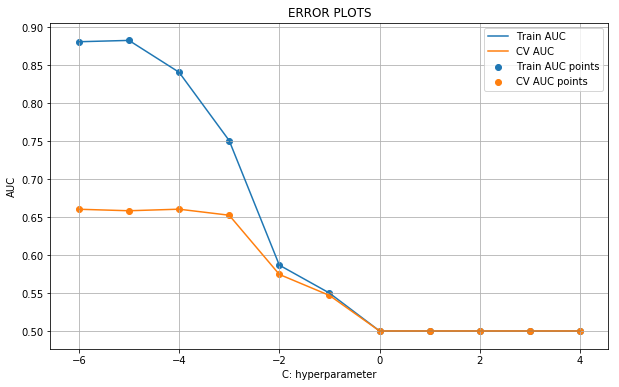

In [108]:
plt.clf()
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.color = '#FFFFFF'
plt.grid()
plt.show()

In [109]:
best_k=0.0001

<h4>Train The Model</h4>

In [110]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

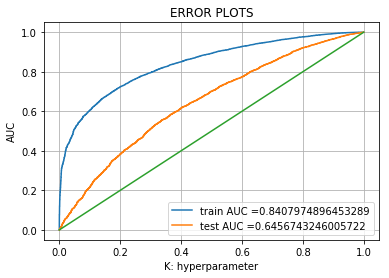

In [111]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [112]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999991298370186 for threshold 0.803


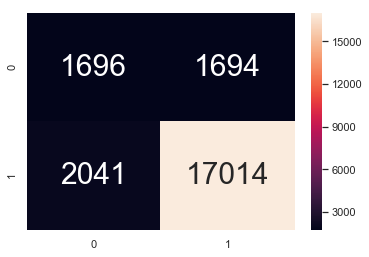

In [113]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.816


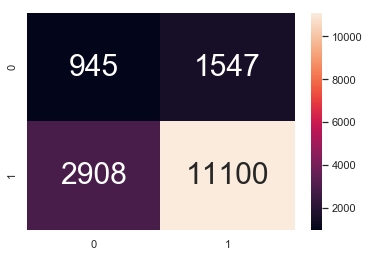

In [114]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

## l2 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))


100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


In [116]:
import math 
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 36909.88it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


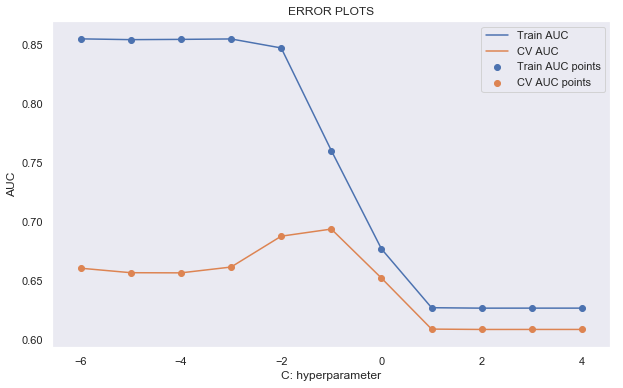

In [117]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [118]:
best_k=0.1

<h4>Train The Model</h4>

In [119]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

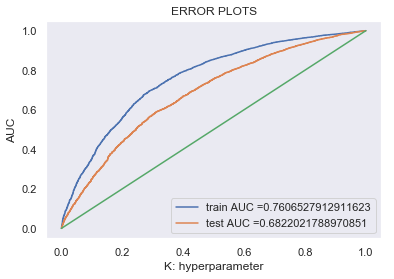

In [120]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [121]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.784


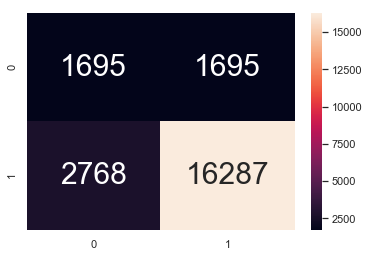

In [122]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.82


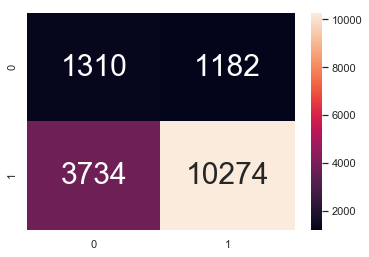

In [123]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

##### l2 regularizer gives better AUC score as compared to l1 regularizer. So we will use l2 regularizer

# Applying SVM on TFIDF,<font color='red'> SET 2</font>

### Creating Data Matrix

In [124]:
# Please write all the code with proper documentation


# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_title_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_title_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_cat_ohe,X_cv_sub_ohe, X_cv_price_norm,X_cv_project_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_title_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 7106) (22445,)
(11055, 7106) (11055,)
(16500, 7106) (16500,)


## l1 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [125]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:05<00:00,  2.29it/s]


In [127]:
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 11029.73it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


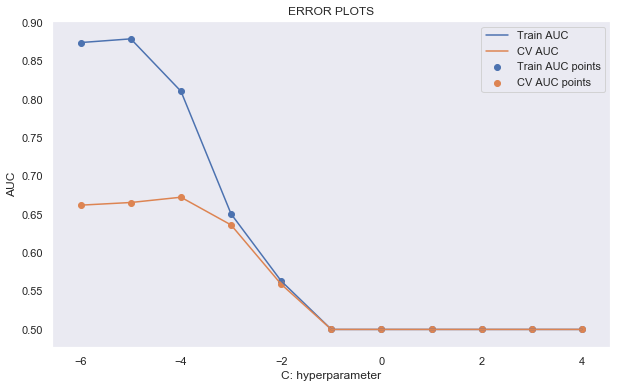

In [128]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [129]:
best_k=0.0001

<h4>Train The Model</h4>

In [130]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

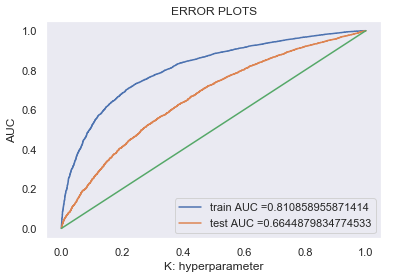

In [131]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [132]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.807


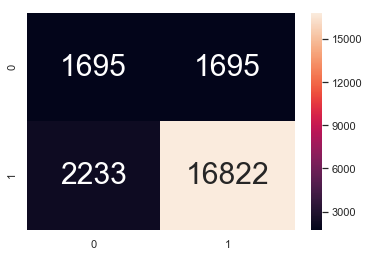

In [133]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.821


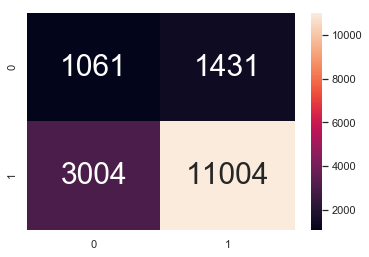

In [134]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

## l2 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:04<00:00,  2.51it/s]


In [136]:
import math 
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 14445.00it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


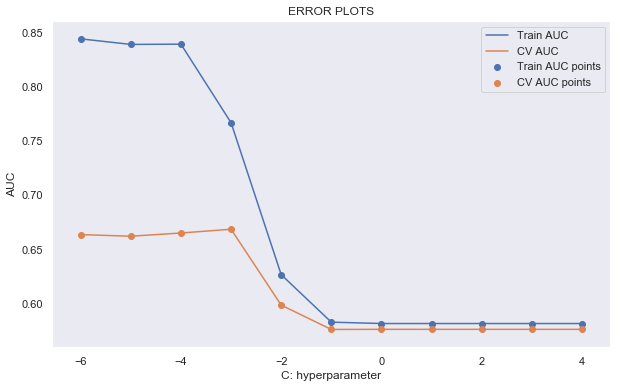

In [137]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [138]:
best_k=0.001

<h4>Train The Model</h4>

In [139]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

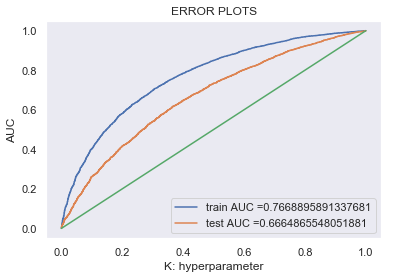

In [140]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [141]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.796


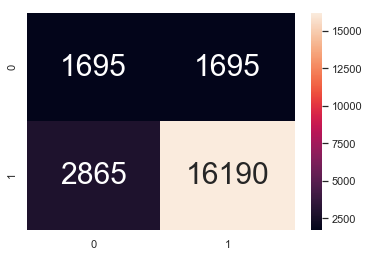

In [142]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.826


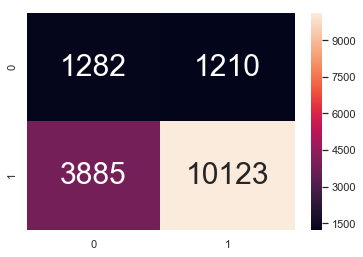

In [143]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

#### l2 and l1 regularizers are performing equally good.

# Applying SVM on AVG W2V,<font color='red'> SET 3</font>

### Creating Data Matrix

In [144]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((avg_w2v_essay_train,avg_w2v_title_train, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_cr = hstack((avg_w2v_essay_cv,avg_w2v_title_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_cat_ohe,X_cv_sub_ohe, X_cv_price_norm,X_cv_project_norm)).tocsr()
X_te = hstack((avg_w2v_essay_test,avg_w2v_title_test, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


## l1 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [145]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:22<00:00,  2.20s/it]


In [147]:
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 48210.39it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


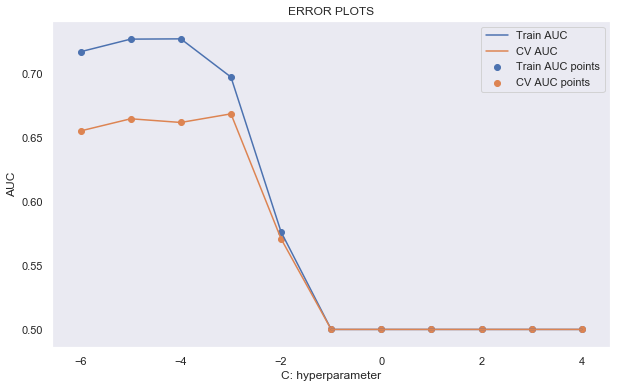

In [148]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [149]:
best_k=0.0012

<h4>Train The Model</h4>

In [150]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

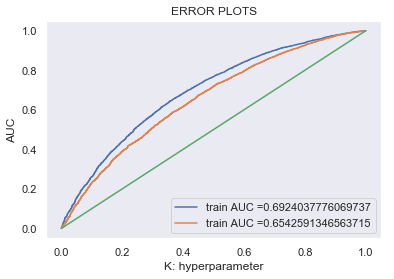

In [152]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [153]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.817


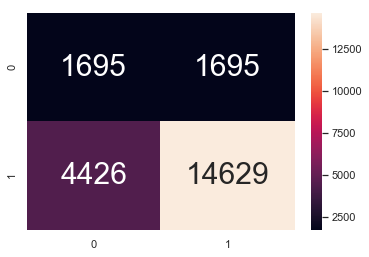

In [154]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.843


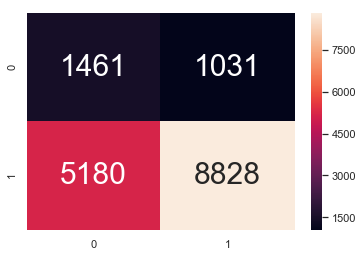

In [155]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

## l2 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:12<00:00,  1.14s/it]


In [157]:
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 18656.43it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


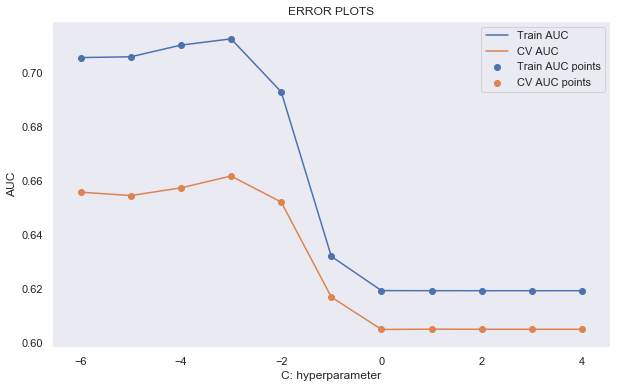

In [158]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [159]:
best_k=0.0012

<h4>Train The Model</h4>

In [160]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

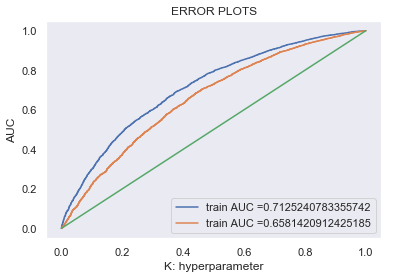

In [161]:
x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [162]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.813


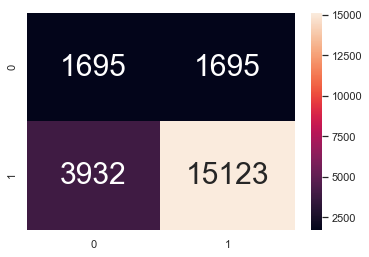

In [163]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.84


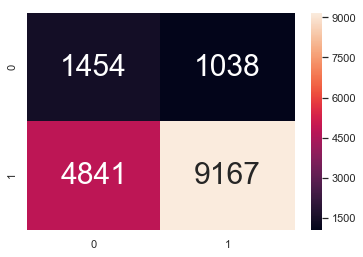

In [164]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

##### l2 and l1 regularizers perform almost same.

# Applying SVM on TFIDF W2V,<font color='red'> SET 4</font>

### Creating Data Matrix

In [165]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_train_essay,tfidf_w2v_train_title, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm)).tocsr()
X_cr = hstack((tfidf_w2v_cv_essay,tfidf_w2v_cv_title, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_cat_ohe,X_cv_sub_ohe, X_cv_price_norm,X_cv_project_norm)).tocsr()
X_te = hstack((tfidf_w2v_test_essay,tfidf_w2v_test_title, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 702) (22445,)
(11055, 702) (11055,)
(16500, 702) (16500,)


## l1 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [166]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [167]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
   
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:21<00:00,  2.13s/it]


In [168]:
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 34585.72it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


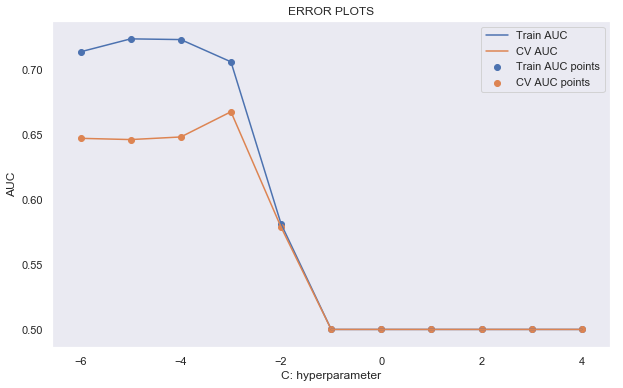

In [169]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [170]:
best_k=0.002

<h4>Train The Model</h4>

In [171]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

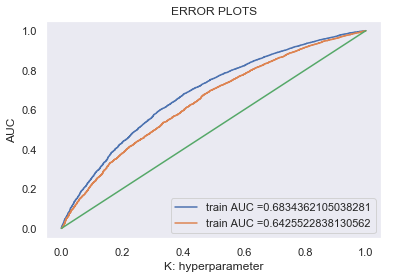

In [172]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [173]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.823


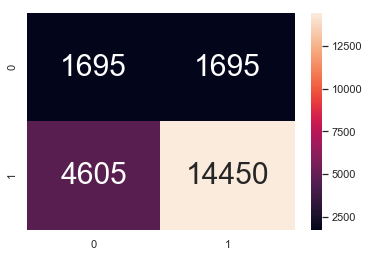

In [174]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.844


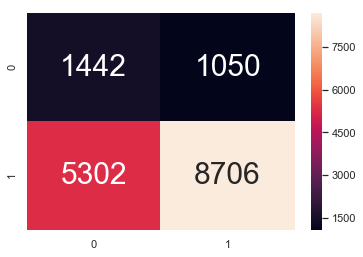

In [175]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

## l2 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
     
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [00:11<00:00,  1.08s/it]


In [177]:
import math 
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 30881.76it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


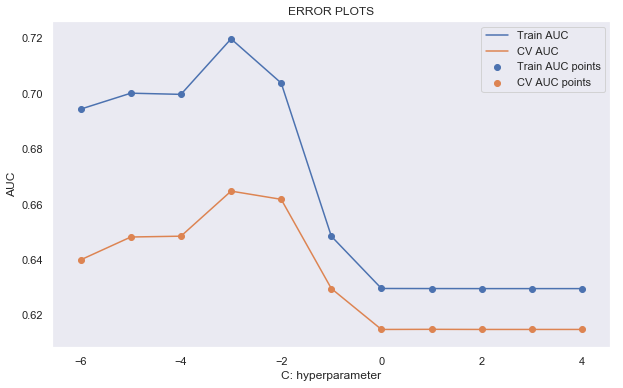

In [178]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [179]:
best_k=0.001

<h4>Train The Model</h4>

In [180]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

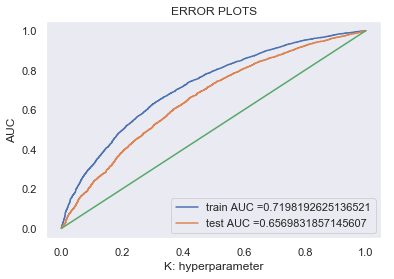

In [181]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

##### l2 regularizer is somewhat better than l1

<h4>Confusion Matrix</h4>

In [182]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.812


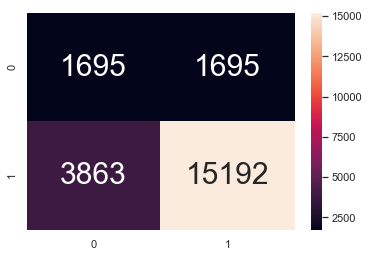

In [183]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.835


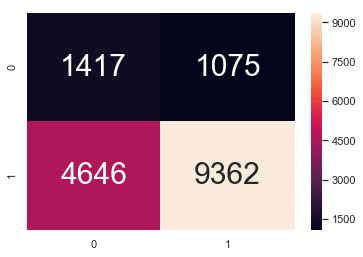

In [184]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

##### l2 is better than l1

<h2>Set 5 : SVM on Categorical features, Numerical features & Essay Sentiments</h2>

### Dimensionality Reduction of tfidf encoded essay feature

In [185]:
#X_train_essay_tfidf

In [188]:
from sklearn.decomposition import TruncatedSVD as TSVD

t_svd = TSVD(n_components = X_train_essay_tfidf.shape[1]-1)
t_svd.fit_transform(X_train_essay_tfidf)

percentage_var_explained = t_svd.explained_variance_ / np.sum(t_svd.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

print(cum_var_explained)

[0.00202167 0.0119405  0.02054456 ... 1.         1.         1.        ]


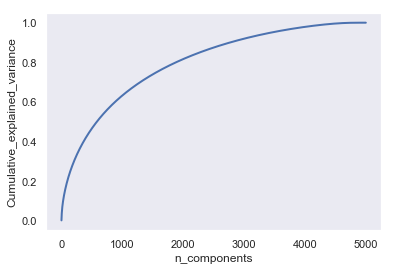

In [189]:
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Preserving 90% variance, we take 3300 points.

In [190]:
tsvd = TSVD(n_components = 3300)
X_train_essay_tfidf = tsvd.fit_transform(X_train_essay_tfidf)
X_test_essay_tfidf = tsvd.fit_transform(X_test_essay_tfidf)
X_cv_essay_tfidf = tsvd.fit_transform(X_cv_essay_tfidf)

### Creating Data Matrix

In [192]:
X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe, X_train_price_norm,X_train_project_norm,X_train_title_norm,X_train_essay_norm,essay_sent_pos_train,essay_sent_neg_train,essay_sent_neu_train,essay_sent_comp_train,X_train_essay_tfidf)).tocsr()
X_cr = hstack((X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_cat_ohe,X_cv_sub_ohe, X_cv_price_norm,X_cv_project_norm,X_cv_title_norm,X_cv_essay_norm,essay_sent_pos_cv,essay_sent_neg_cv,essay_sent_neu_cv,essay_sent_comp_cv,X_cv_essay_tfidf)).tocsr()
X_te = hstack((X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe, X_test_price_norm,X_test_project_norm,X_test_title_norm,X_test_essay_norm,essay_sent_pos_test,essay_sent_neg_test,essay_sent_neu_test,essay_sent_comp_test,X_test_essay_tfidf)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 3408) (22445,)
(11055, 3408) (11055,)
(16500, 3408) (16500,)


## l1 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [193]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [194]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [02:02<00:00, 11.97s/it]


In [195]:
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 30096.11it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


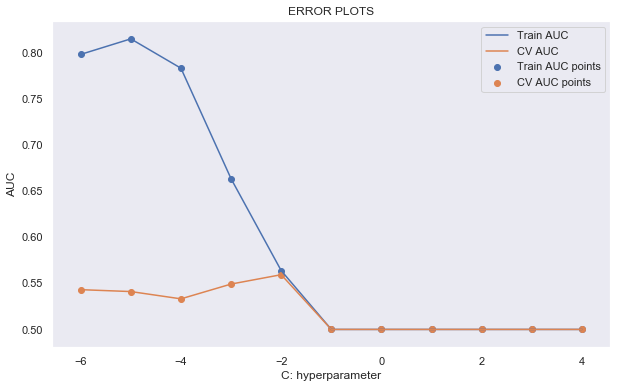

In [196]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [197]:
best_k=0.01

<h4>Train The Model</h4>

In [198]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l1', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

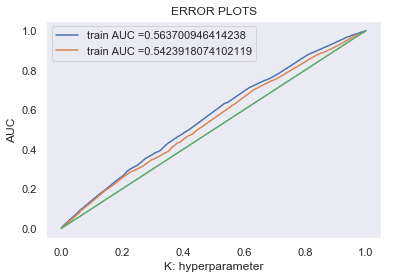

In [199]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [200]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2490946824340199 for threshold 0.837


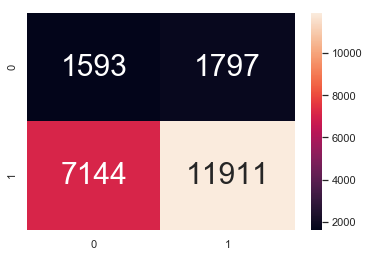

In [201]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24706524763673934 for threshold 0.841


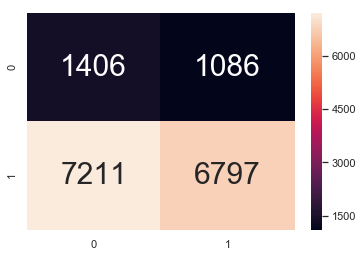

In [202]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

## l2 regularizer based Model

<h4>Hyperparameter Tuning: Simple for loop (if you are having memory limitations use this)</h4>

In [203]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

train_auc = []
cv_auc = []
log_alphas=[]

parameters = {'alpha': [10**-6,10**-5,10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}

for i in tqdm(parameters['alpha']):
    sgd = SGDClassifier(alpha=i, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
    clf_s = CalibratedClassifierCV(sgd, method='sigmoid')
    clf_s.fit(X_tr, y_train)
    y_train_pred = batch_predict(clf_s, X_tr)    
    y_cv_pred = batch_predict(clf_s, X_cr)
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

100%|██████████| 11/11 [01:00<00:00,  5.62s/it]


In [205]:
for a in tqdm(parameters['alpha']):
    b = math.log10(a)
    log_alphas.append(b)
print(log_alphas)

100%|██████████| 11/11 [00:00<00:00, 73233.88it/s]

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


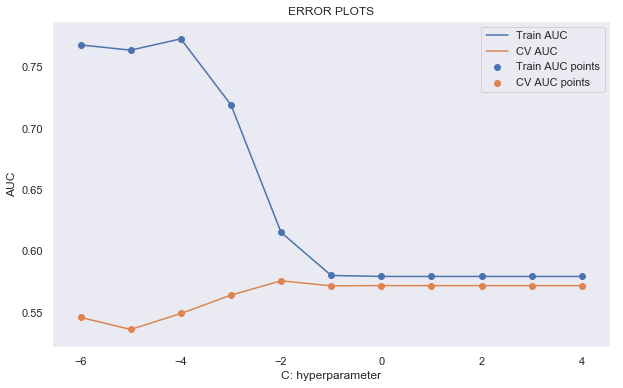

In [206]:
plt.figure(figsize=(10,6))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [207]:
best_k=0.01

<h4>Train The Model</h4>

In [208]:
from sklearn.metrics import roc_curve, auc

neigh  = SGDClassifier(alpha=best_k, penalty='l2', loss='hinge',random_state = 0 ,class_weight = 'balanced')
clf_s = CalibratedClassifierCV(neigh, method='sigmoid')
clf_s.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf_s, X_tr)    
y_test_pred = batch_predict(clf_s, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

x=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

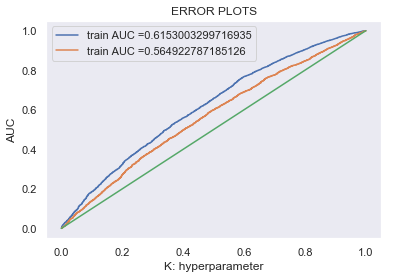

In [209]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(x,x)
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h4>Confusion Matrix</h4>

In [210]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.834


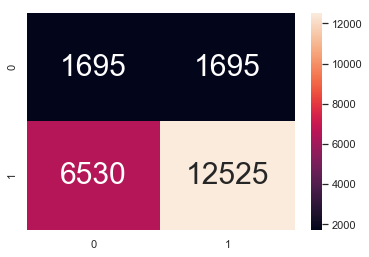

In [212]:
print("Train confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred,tr_thresholds,train_fpr,train_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.25 for threshold 0.857


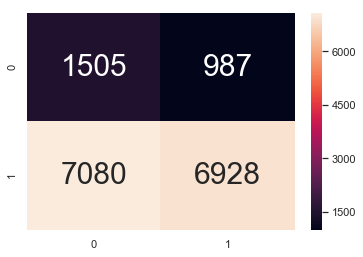

In [213]:
print("Test confusion matrix")
conf_matr_df_train_2=pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred,tr_thresholds,test_fpr,test_fpr)),range(2),range(2))
sns.set(font_scale=1)#for label size
sns.heatmap(conf_matr_df_train_2,annot=True,annot_kws={"size":30},fmt='g')

##### l2 regularizer performs just a bit better than l1.

<h1>3. Conclusions</h1>

In [215]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Vectorizer","Regularizer","AUC"]
x.add_row(["BOW","L1",0.65])
x.add_row(["BOW","L2",0.69])
x.add_row(["TFIDF","L1",0.66])
x.add_row(["TFIDF","L2",0.67])
x.add_row(["AVG W2V","L1",0.65])
x.add_row(["AVG W2V","L2",0.66])
x.add_row(["TFIDF W2V","L1",0.64])
x.add_row(["TFIDF W2V","L2",0.66])
x.add_row(["TRUNCATED TFIDF","L1",0.54])
x.add_row(["TRUNCATED TFIDF","L2",0.56])
print(x)

+-----------------+-------------+------+
|    Vectorizer   | Regularizer | AUC  |
+-----------------+-------------+------+
|       BOW       |      L1     | 0.65 |
|       BOW       |      L2     | 0.69 |
|      TFIDF      |      L1     | 0.66 |
|      TFIDF      |      L2     | 0.67 |
|     AVG W2V     |      L1     | 0.65 |
|     AVG W2V     |      L2     | 0.66 |
|    TFIDF W2V    |      L1     | 0.64 |
|    TFIDF W2V    |      L2     | 0.66 |
| TRUNCATED TFIDF |      L1     | 0.54 |
| TRUNCATED TFIDF |      L2     | 0.56 |
+-----------------+-------------+------+


# INFERENCE:

1. L2 Regularizer is somewhat better than L1 Regularizer in all the cases.
2. If we use TRUNCATED TFIDF, the AUC score drops significantly. So, it is not a good model.